<a href="https://colab.research.google.com/github/DanielCortez94/Financial-Sales/blob/main/Project_Financials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROJECT: Analysis Financial - Sales

##Library loading and Data Upload

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from math import ceil
from scipy import stats as st
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('Financials.csv', sep=',')
df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,"$2,475.00",$260.00,$300.00,"$7,42,500.00","$1,11,375.00","$6,31,125.00","$6,18,750.00","$12,375.00",01/03/2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,$546.00,$260.00,$300.00,"$1,63,800.00","$24,570.00","$1,39,230.00","$1,36,500.00","$2,730.00",01/10/2014,10,October,2014
697,Government,Mexico,Montana,High,"$1,368.00",$5.00,$7.00,"$9,576.00","$1,436.40","$8,139.60","$6,840.00","$1,299.60",01/02/2014,2,February,2014
698,Government,Canada,Paseo,High,$723.00,$10.00,$7.00,"$5,061.00",$759.15,"$4,301.85","$3,615.00",$686.85,01/04/2014,4,April,2014


## Data Analytics

###Data Cleaning

In [ ]:
#Standardize column values
df.columns = df.columns.str.strip()
df['Discounts'] = df['Discounts'].str.replace('$-', 'N/A', regex=False)

In [ ]:
for column in df.columns:
    df[column] = df[column].astype(str).str.replace('[\$,]', '', regex=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Segment              700 non-null    object
 1   Country              700 non-null    object
 2   Product              700 non-null    object
 3   Discount Band        700 non-null    object
 4   Units Sold           700 non-null    object
 5   Manufacturing Price  700 non-null    object
 6   Sale Price           700 non-null    object
 7   Gross Sales          700 non-null    object
 8   Discounts            700 non-null    object
 9   Sales                700 non-null    object
 10  COGS                 700 non-null    object
 11  Profit               700 non-null    object
 12  Date                 700 non-null    object
 13  Month Number         700 non-null    object
 14  Month Name           700 non-null    object
 15  Year                 700 non-null    object
dtypes: objec

In [ ]:
# Define the columns you want to convert to numeric
numeric_columns = ['Units Sold','Sale Price','Gross Sales','Manufacturing Price','Sales', 'Profit',  'COGS','Discounts','Month Number','Year', ]  # Reemplaza con los nombres de tus columnas

# Convert columns to numeric
for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

print(df.dtypes)  # Print the column data types to verify

Segment                 object
Country                 object
Product                 object
Discount Band           object
Units Sold             float64
Manufacturing Price    float64
Sale Price             float64
Gross Sales            float64
Discounts              float64
Sales                  float64
COGS                   float64
Profit                 float64
Date                    object
Month Number             int64
Month Name              object
Year                     int64
dtype: object


In [ ]:
# Convert N/A to 0 for analysis uses
df = df.fillna(0)

In [ ]:
# Check the number of null values
df.isnull().sum().sort_values(ascending=False)

,0
Segment,0
Country,0
Product,0
Discount Band,0
Units Sold,0
Manufacturing Price,0
Sale Price,0
Gross Sales,0
Discounts,0
Sales,0


In [ ]:
#Drop Date Column
df.drop(columns=['Date'], inplace = True)

Conclusions:

*   'Date' --> Is irrelevant for the analysis since the months and their numbers will be considered



###EDA OF NUMERICAL VARIABLES

In [ ]:
##Define the function to create the graphs of the variable data
def graphics_eda_numerical(num):

    # Calculate the number of rows
    num_cols = num.shape[1] if isinstance(num.shape[1], (int, float)) else 0
    rows = ceil(num_cols / 2)

    # Define the graph
    f, ax = plt.subplots(nrows=rows, ncols=2, figsize=(16, rows * 6))
    ax = ax.flat

    # Create the loop that adds graphics
    for each, variable in enumerate(num):
        ax[each].hist(num[variable].dropna(), bins=20)
        ax[each].set_title(variable, fontsize=12, fontweight="bold")
        ax[each].tick_params(labelsize=12)
        ax[each].set_xlabel(variable)

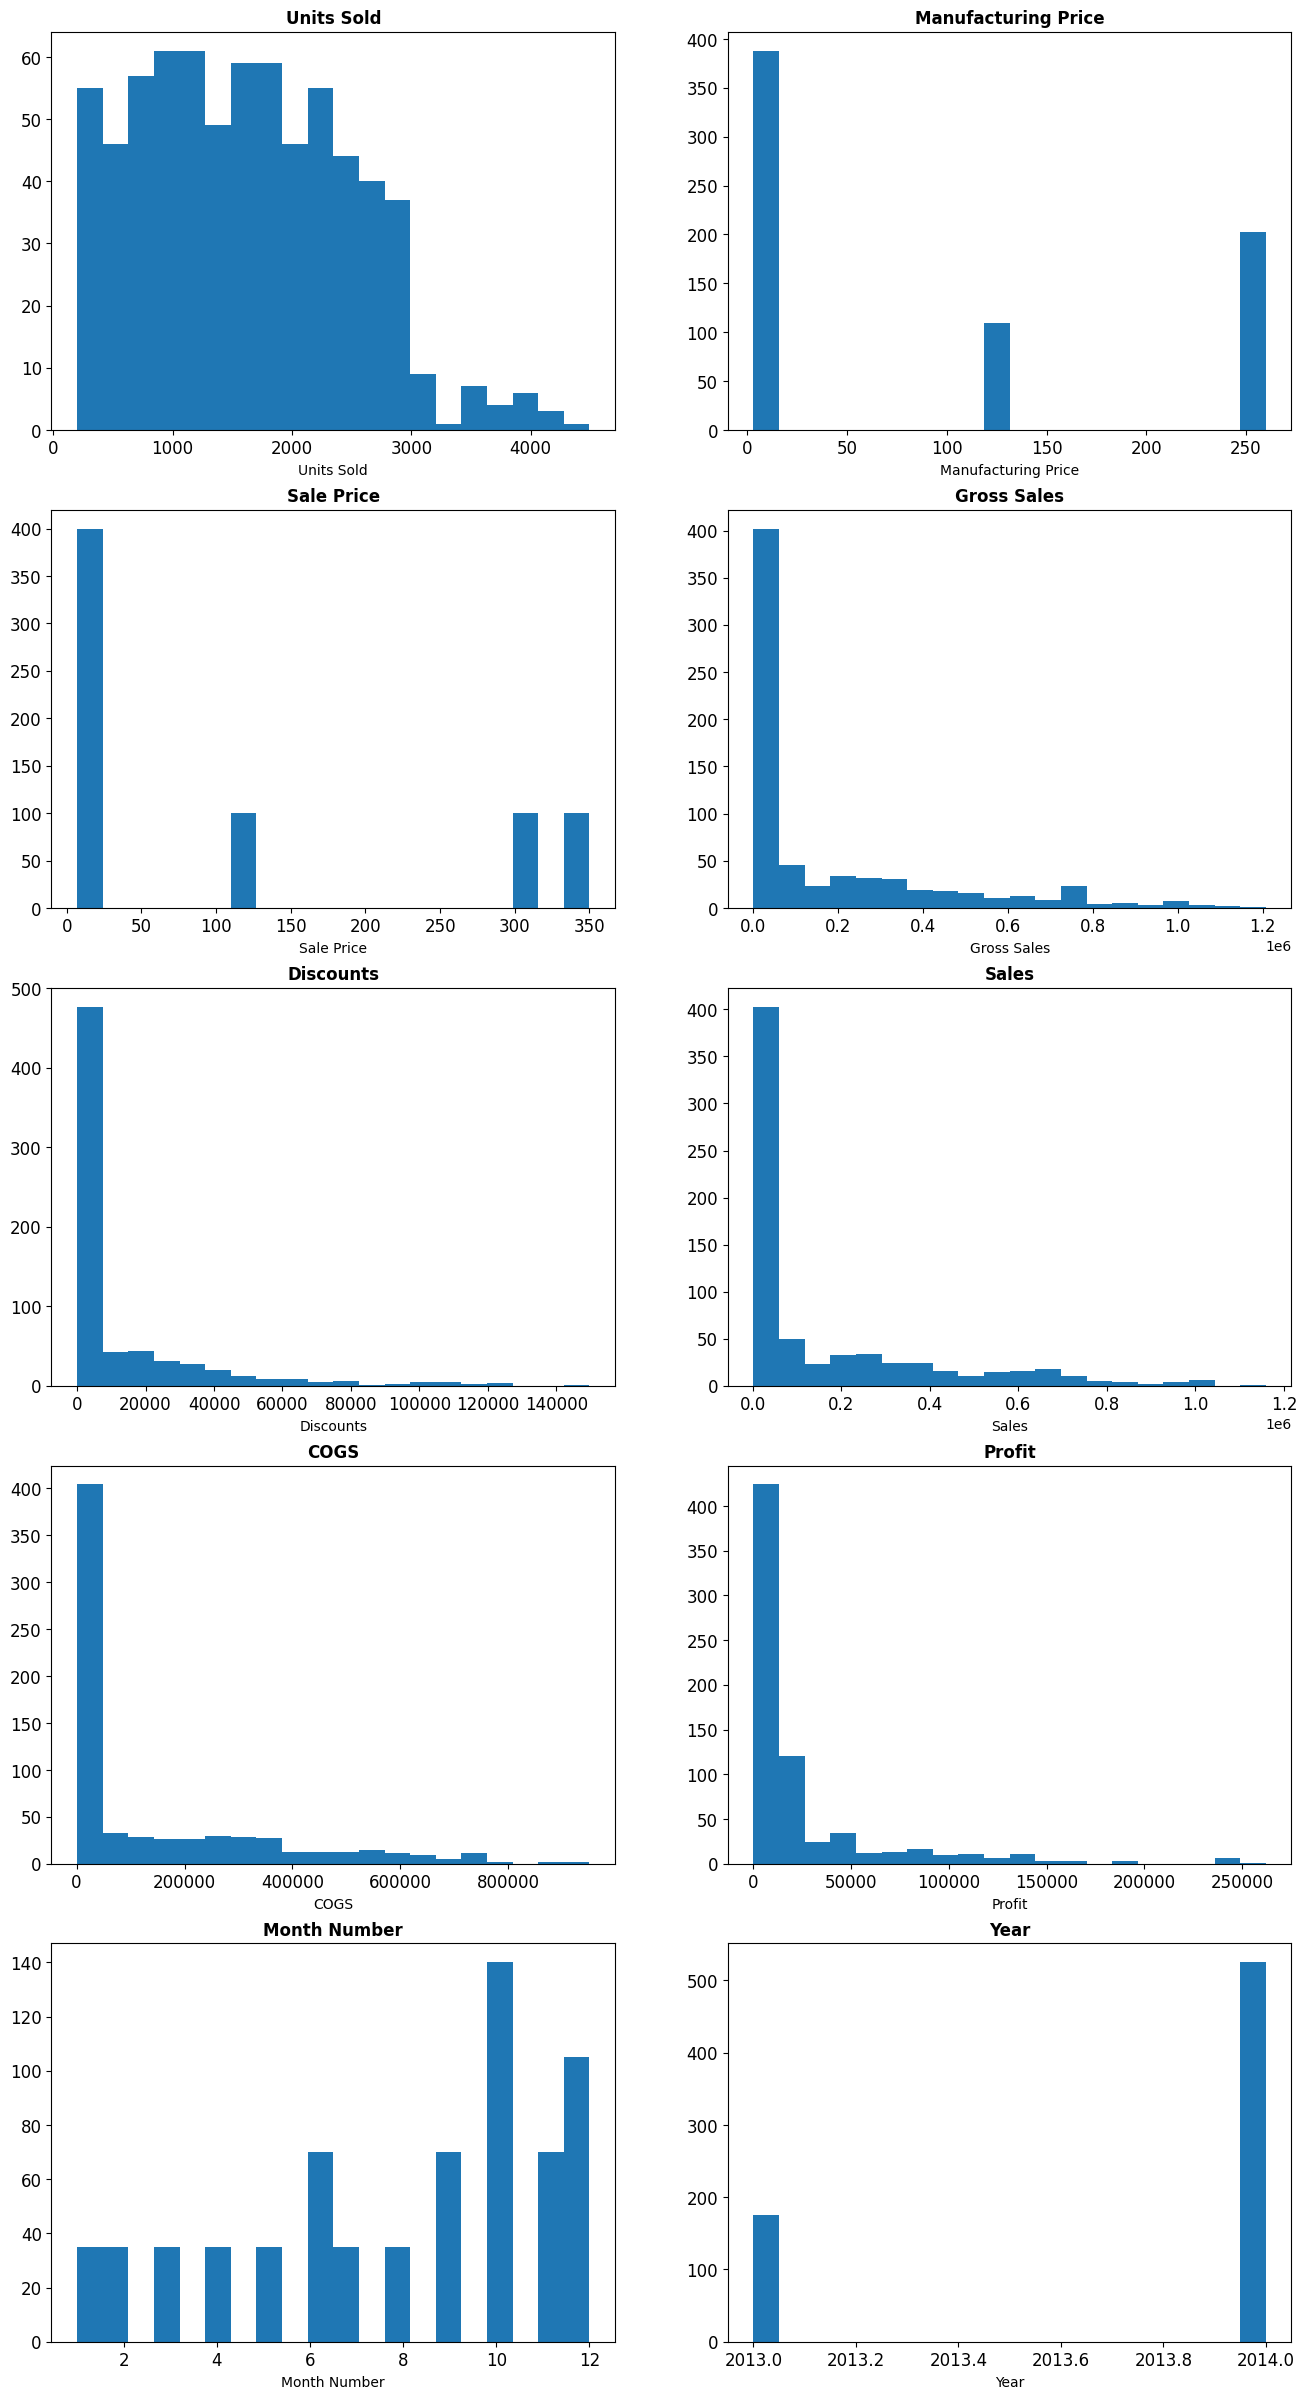

In [ ]:
#Get the numeric columns from the DataFrame
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

#Create a DataFrame with only the numeric columns
df_numeric = df[numeric_cols]

#Call the graphics_eda_numerical function with the numeric DataFrame
graphics_eda_numerical(df_numeric)

In [ ]:
# Define the function to create the graphs of the numerical data
def statistics_cont(num):
    #calculate describe
    statistics = num.describe().T
    #Add the median
    statistics['median'] = num.median()
    #Rearrange so that the median is next to the mean
    statistics = statistics.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Return it
    return(statistics)

In [ ]:
statistics_cont(df.select_dtypes(include='number'))
statistics_cont = df.describe().T.round(2)
statistics_cont.index.name = 'Variable'

In [ ]:
statistics_cont.style.set_caption('Descriptive Statistics of Continuous Variables')

,count,mean,std,min,25%,50%,75%,max
Variable,,,,,,,,
Units Sold,700.000000,1608.290000,867.430000,200.000000,905.000000,1542.500000,2229.120000,4492.500000
Manufacturing Price,700.000000,96.480000,108.600000,3.000000,5.000000,10.000000,250.000000,260.000000
Sale Price,700.000000,118.430000,136.780000,7.000000,12.000000,20.000000,300.000000,350.000000
Gross Sales,700.000000,182759.430000,254262.280000,1799.000000,17391.750000,37980.000000,279025.000000,1207500.000000
Discounts,700.000000,13150.350000,22962.930000,0.000000,800.320000,2585.250000,15956.350000,149677.500000
Sales,700.000000,169609.070000,236726.350000,1655.080000,15928.000000,35540.200000,261077.500000,1159200.000000
COGS,700.000000,145475.210000,203865.510000,918.000000,7490.000000,22506.250000,245607.500000,950625.000000
Profit,700.000000,25244.320000,41834.380000,0.000000,2805.960000,9242.200000,22662.000000,262200.000000
Month Number,700.000000,7.900000,3.380000,1.000000,5.750000,9.000000,10.250000,12.000000


Conclusions:
- **Variability:** The variables 'Sales', 'COGS', 'Profit' and 'Units Sold'
They show considerable variability, indicating a wide range of values.
- **Sales and COGS**: 'Sales' and 'COGS' have minimum values ​​of 0, which means that there may be cases without sales or costs of goods sold.
- **Losses:** 'Profit' presents minimum negative values, indicating the presence of losses in some cases.
- **Averages:** The averages of 'Sales', 'COGS', 'Profit' and 'Units Sold' are 169609.07, 145475.21, 25244.32, 1608.29, respectively.

Key points:

- Wide dispersion in the main variables.
- Possibility of cases without sales or costs.
- Presence of losses in some cases.
- Know the averages and ranges of each variable.

###EDA OF CATEGORIAL VARIABLES

In [264]:
#Define the function to create the graphs of the categorical data
def graphics_eda(cat):
    #Calculate the number of rows we need
    from math import ceil
    rows = ceil(cat.shape[1] / 2)

    #Define the graph
    f, ax = plt.subplots(nrows = rows, ncols = 2, figsize = (16, rows * 6))

    #Flatten to iterate through the graph as if it were 1 dimension instead of 2
    ax = ax.flat

    #Create the loop that adds graphics
    for each, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[each])
        ax[each].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[each].tick_params(labelsize = 12)

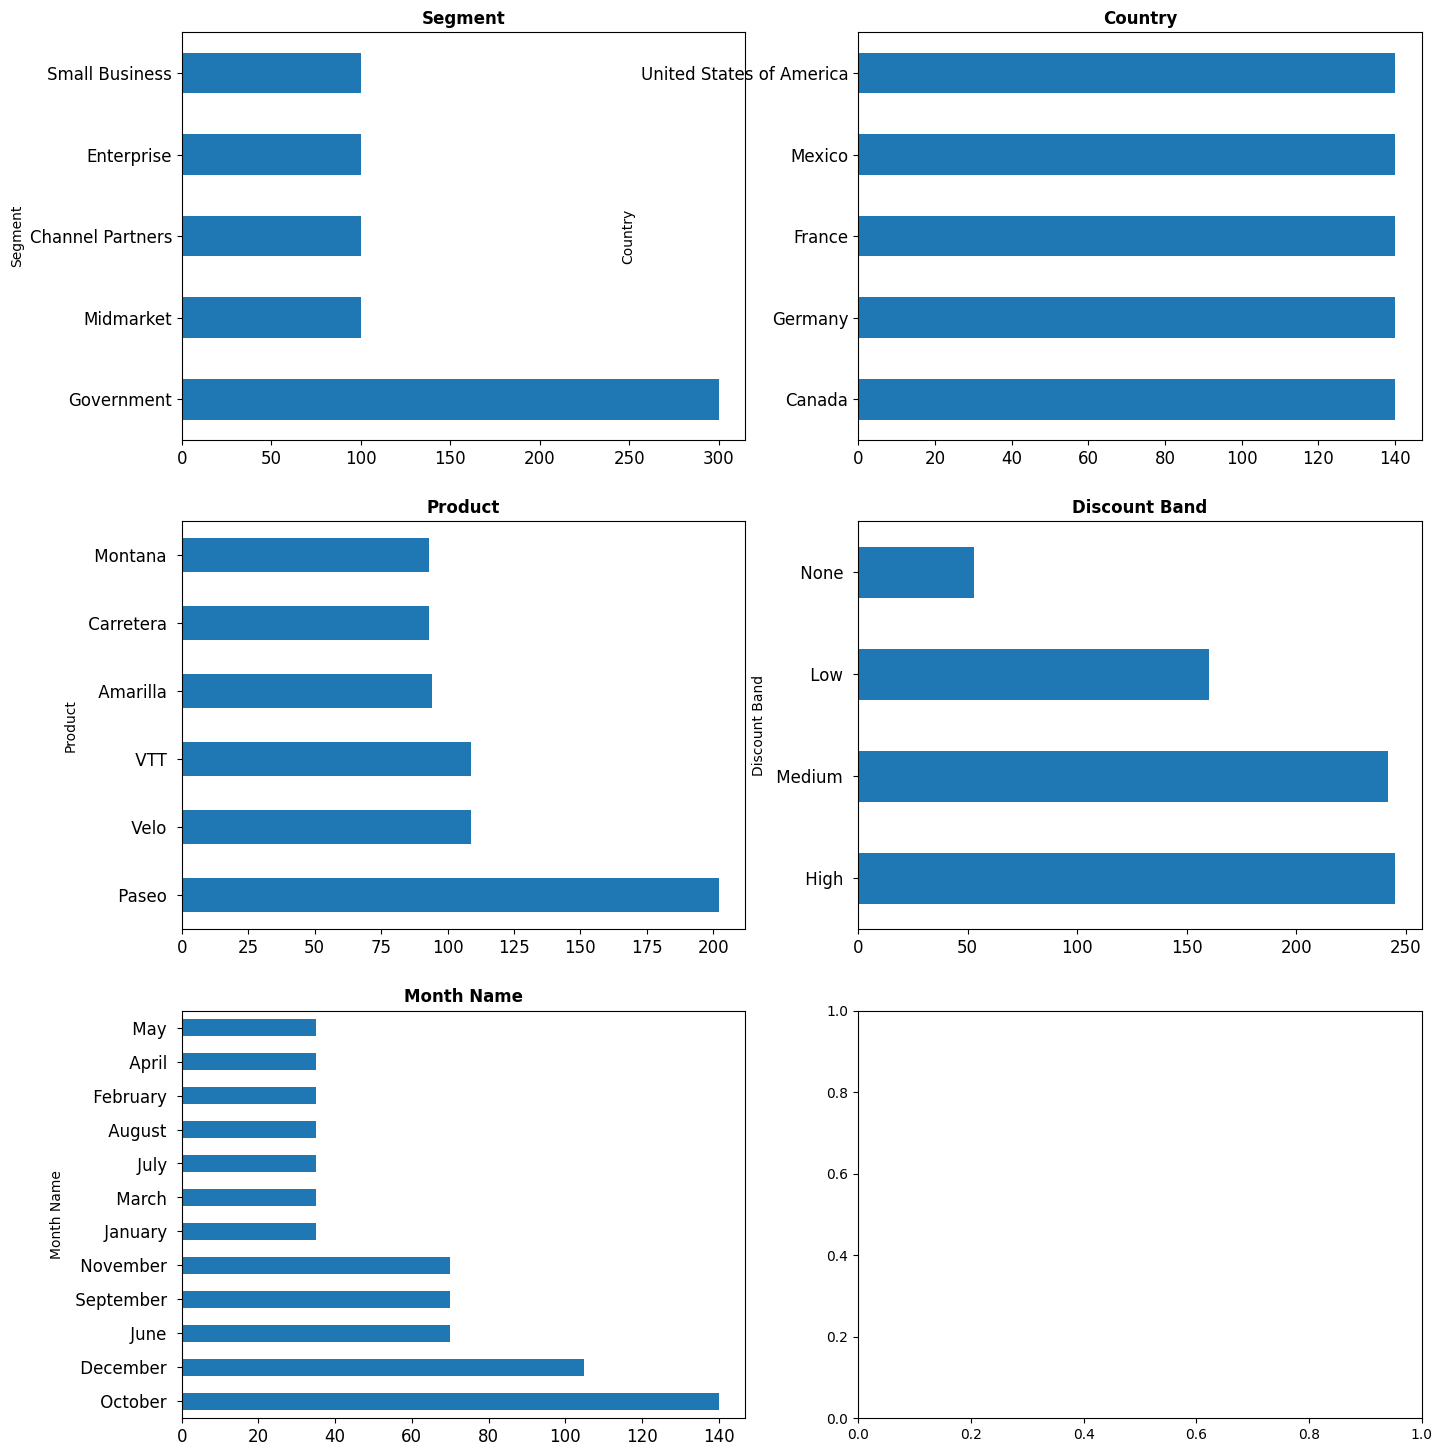

In [265]:
graphics_eda(df.select_dtypes(include = 'object'))

PROFIT: TARGET VALUE

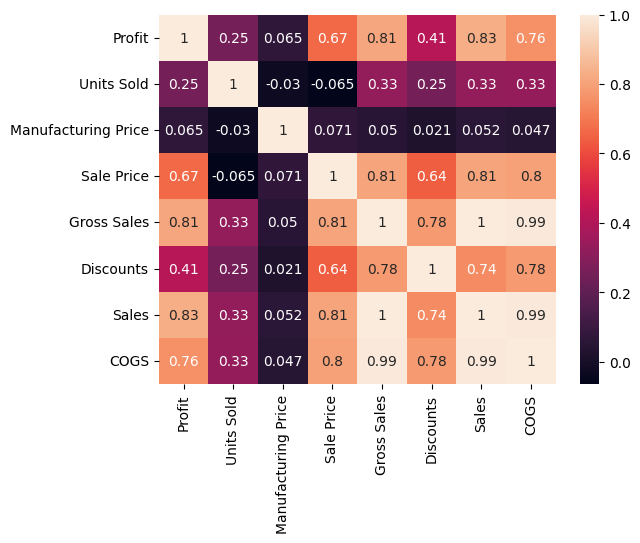

In [266]:
#Correlation graph
correlation_matrix = df[['Profit', 'Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

###Profit by Segment

<ipython-input-234-b39cae283da7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Profit'])


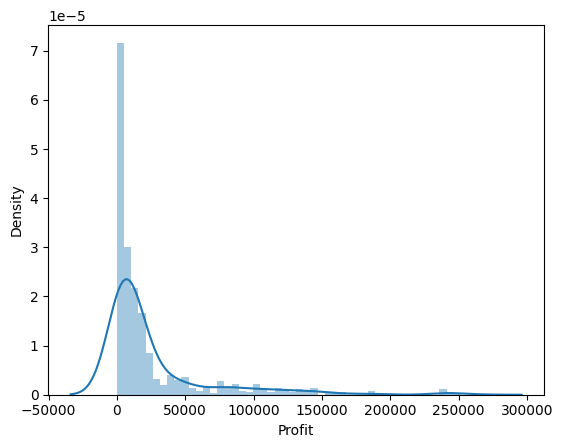

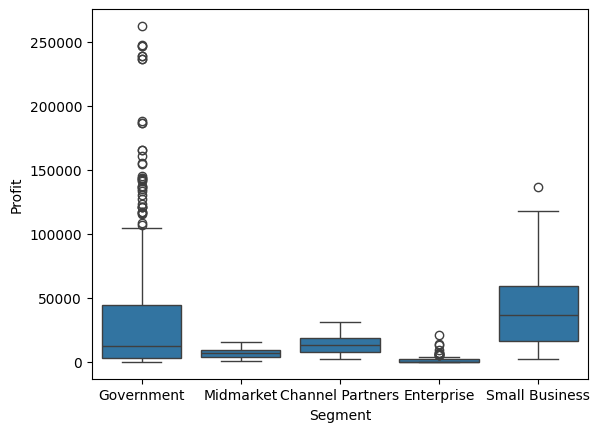

In [ ]:
#Graphics

sns.distplot(df['Profit'])
plt.show()

sns.boxplot(x='Segment', y='Profit', data=df)
plt.show()

###Profit by Sales and Unit Solds



In [ ]:
#Correlation Profit with others variables
correlation_matrix = df[['Sales', 'Profit', 'Units Sold']].corr()
print(correlation_matrix)

               Sales    Profit  Units Sold
Sales       1.000000  0.831368    0.326914
Profit      0.831368  1.000000    0.251264
Units Sold  0.326914  0.251264    1.000000


<ipython-input-236-d0e5ed5e6e27>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_units_by_sales_range = df.groupby('Sales_Range')[['Profit', 'Units Sold']].mean()


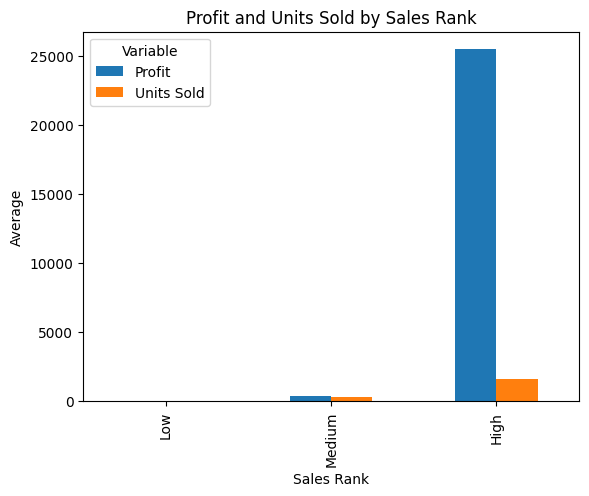

In [ ]:
# Define sales ranges
bins = [0, 500, 2000, float('inf')]
labels = ['Low', 'Medium', 'High']

# Create a new column with the sales ranges
df['Sales_Range'] = pd.cut(df['Sales'], bins=bins, labels=labels)

# Calculate the average Profit and Units Sold for each sales range
profit_units_by_sales_range = df.groupby('Sales_Range')[['Profit', 'Units Sold']].mean()

# Visualize with a grouped bar chart
profit_units_by_sales_range.plot(kind='bar')
plt.xlabel('Sales Rank')
plt.ylabel('Average')
plt.title('Profit and Units Sold by Sales Rank')
plt.legend(title='Variable')
plt.show()

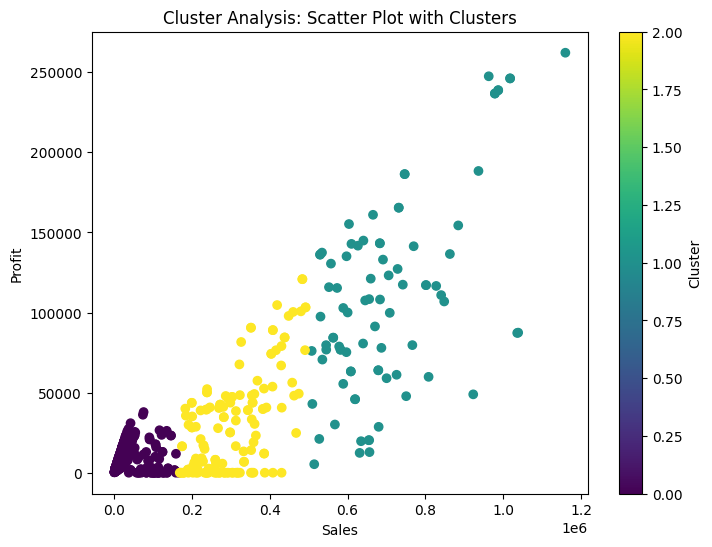

In [ ]:
#Cluster Analysis:relationship between sales, profit and unit soles
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(df[['Sales', 'Profit', 'Units Sold']])
df['cluster'] = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(df['Sales'], df['Profit'], c=df['cluster'], cmap='viridis')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Cluster Analysis: Scatter Plot with Clusters')
plt.colorbar(label='Cluster')
plt.show()

###Profit by Product,Country and Discount

In [ ]:
#Crosstab Profit by Country and Product
profit_by_country_product = pd.crosstab(index=df['Country'],
                                         columns=df['Product'],
                                         values=df['Profit'],
                                         aggfunc='sum')

print(profit_by_country_product)

Product                   Amarilla   Carretera    Montana       Paseo   \
Country                                                                  
Canada                    671693.88   460265.34  321867.03  1282826.74   
France                    685375.13   450268.65  472844.62   863968.56   
Germany                   643558.51   424857.18  568813.37   772509.24   
Mexico                    506897.64   458190.92  337689.31   955781.39   
United States of America  428518.91   264332.80  470066.80  1042900.78   

Product                        VTT       Velo   
Country                                         
Canada                    566202.56  390862.09  
France                    716371.09  717926.49  
Germany                   613522.77  797624.00  
Mexico                    588484.96  206178.89  
United States of America  671766.64  318857.25  


In [ ]:
# Calculate percentages per row
profit_percentage_by_row = profit_by_country_product.div(profit_by_country_product.sum(axis=1), axis=0) * 100

# Calculate percentages per columna
profit_percentage_by_col = profit_by_country_product.div(profit_by_country_product.sum(axis=0), axis=1) * 100

# Print the percentage tables
print("\nPorcentajes por fila:\n", profit_percentage_by_row)
print("\nPorcentajes por columna:\n", profit_percentage_by_col)


Porcentajes por fila:
 Product                   Amarilla   Carretera    Montana      Paseo   \
Country                                                                 
Canada                    18.184765   12.460761   8.713905  34.729962   
France                    17.543337   11.525389  12.103259  22.114739   
Germany                   16.843179   11.119339  14.886953  20.218071   
Mexico                    16.602050   15.006795  11.060093  31.304014   
United States of America  13.406117    8.269592  14.705933  32.626914   

Product                        VTT       Velo   
Country                                         
Canada                    15.328799  10.581807  
France                    18.336731  18.376545  
Germany                   16.057085  20.875373  
Mexico                    19.274221   6.752828  
United States of America  21.016067   9.975377  

Porcentajes por columna:
 Product                   Amarilla   Carretera    Montana      Paseo   \
Country              

In [ ]:
from scipy.stats import chi2_contingency

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(profit_by_country_product)

# Print the results
print(f"Chi-cuadrado: {chi2:.2f}")
print(f"Value p: {p:.3f}")

Chi-cuadrado: 810517.08
Value p: 0.000


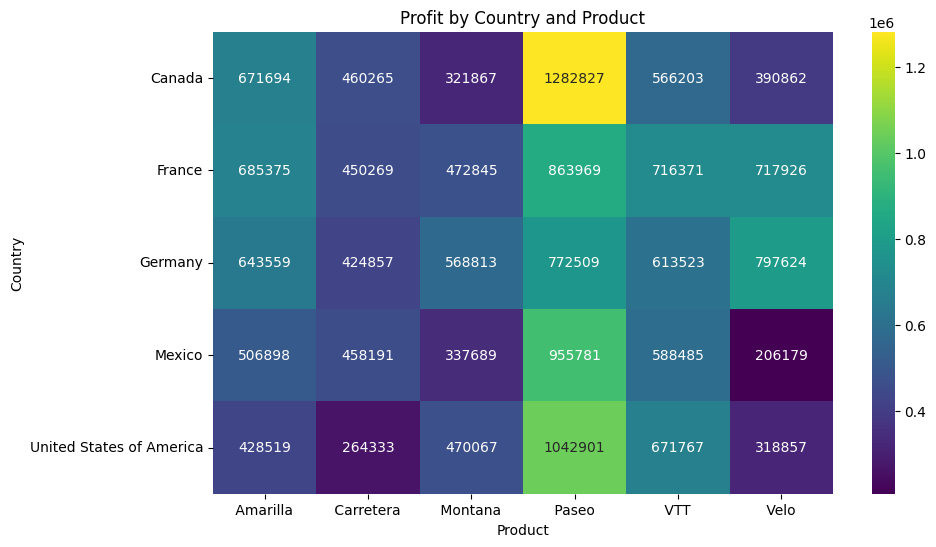

In [ ]:
# Create the heat map
plt.figure(figsize=(10, 6))
sns.heatmap(profit_by_country_product, annot=True, cmap="viridis", fmt=".0f")
plt.title("Profit by Country and Product")
plt.xlabel("Product")
plt.ylabel("Country")
plt.show()

         Product                   Country  Discounts    Profit
18     Amarilla                     France        0.0  266490.0
456       Paseo   United States of America    48300.0  262200.0
481         VTT                     France        0.0  255870.0
48     Amarilla                    Germany    20762.0  246178.0
624        Velo                    Germany    20762.0  246178.0
..           ...                       ...        ...       ...
162   Carretera                     Mexico    49367.5       0.0
158   Carretera                     Mexico    32340.0       0.0
157   Carretera                     Mexico    15400.0       0.0
453       Paseo   United States of America    18700.0       0.0
408       Paseo                     Mexico    11140.0       0.0

[672 rows x 4 columns]


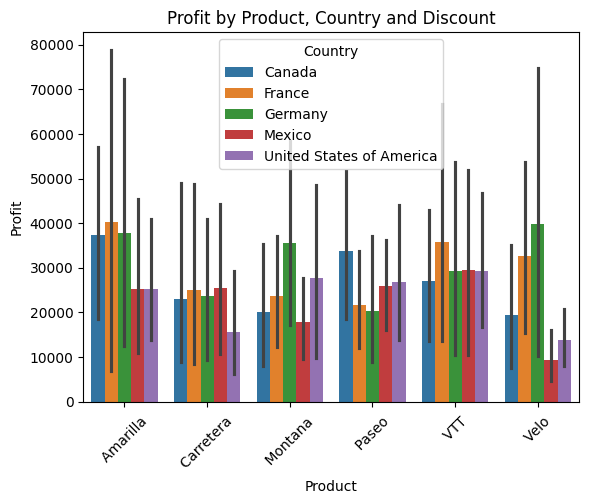

In [ ]:
# Group by product, country and discount and calculate profit sum
profit_by_factors = df.groupby(['Product', 'Country', 'Discounts'])['Profit'].sum().reset_index()

# Show results sorted by profit
print(profit_by_factors.sort_values('Profit', ascending=False))

# View with a grouped bar chart
sns.barplot(x='Product', y='Profit', hue='Country', data=profit_by_factors)
plt.title('Profit by Product, Country and Discount')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Create a new column with the profit margin
df['Profit_Margin'] = (df['Profit'] / df['Sales']) * 100

# Group by product, country and discount and calculate average profit margin
profit_margin_by_factors = df.groupby(['Product', 'Country', 'Discount Band'])['Profit_Margin'].mean().reset_index()

# Show results sorted by profit margin
print(profit_margin_by_factors.sort_values('Profit_Margin', ascending=False))

        Product                   Country Discount Band  Profit_Margin
106       Velo                    Germany         None       58.571429
88         VTT                    Germany         None       54.166667
7     Amarilla                    Germany         High       53.849176
17    Amarilla   United States of America         None       52.976190
76       Paseo   United States of America         None       51.785714
..          ...                       ...           ...            ...
12    Amarilla                     Mexico          Low       12.528345
95        Velo                     Canada         High       12.510342
102       Velo                     France         None        4.000000
98        Velo                     Canada         None        4.000000
114       Velo   United States of America         None        4.000000

[115 rows x 4 columns]


In [ ]:
# Group by discount band and calculate the sum of profits and sales
profit_by_discount = df.groupby('Discount Band')[['Profit', 'Sales']].sum().reset_index()

# Calculate the return on investment (ROI) for each discount band
profit_by_discount['ROI'] = (profit_by_discount['Profit'] / profit_by_discount['Sales']) * 100

# Show results sorted by ROI
print(profit_by_discount.sort_values('ROI', ascending=False))

  Discount Band      Profit        Sales        ROI
3         None   1736455.00   7943654.00  21.859650
1          Low   6188857.71  34629778.71  17.871491
2       Medium   5734475.34  38780430.84  14.787034
0         High   4011235.49  37372486.74  10.733124


In [ ]:
# Create a new column with the gross profit
df['Gross_Profit'] = df['Sales'] - df['COGS']

# Group by product, country and discount and calculate average gross profit
gross_profit_by_factors = df.groupby(['Product', 'Country', 'Discount Band'])['Gross_Profit'].mean().reset_index()

# Show results sorted by gross profit
print(gross_profit_by_factors.sort_values('Gross_Profit', ascending=False))

         Product                   Country Discount Band   Gross_Profit
104        Velo                    Germany          Low   162330.500000
6      Amarilla                     France         None   133245.000000
1      Amarilla                     Canada          Low   109716.000000
8      Amarilla                    Germany          Low   102049.000000
84          VTT                     France         None    85290.000000
..           ...                       ...           ...            ...
30    Carretera                     Mexico         High     2335.113333
7      Amarilla                    Germany         High     2294.302500
98         Velo                     Canada         None     1725.000000
77          VTT                     Canada         High     1629.904000
34    Carretera   United States of America         High     1447.403333

[115 rows x 4 columns]


###Customer segmentation analysis

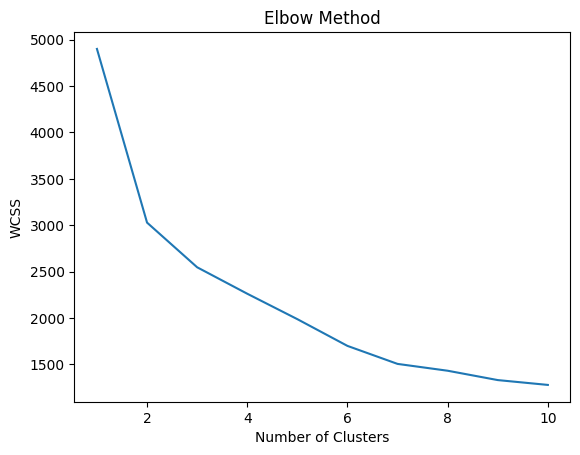

Cluster High value clients:
        Units Sold          Sales        Profit  Manufacturing Price  \
count   444.000000     444.000000    444.000000           444.000000   
mean   1560.448198   28126.709820   8039.321306            92.713964   
std     865.071575   28643.909684   7035.363086           107.081061   
min     218.000000    1655.080000      0.000000             3.000000   
25%     861.000000   10420.620000   2366.840000             5.000000   
50%    1498.000000   20500.875000   5997.865000            10.000000   
75%    2178.000000   32575.612500  12350.000000           250.000000   
max    4492.500000  180416.250000  37867.200000           260.000000   

       Sale Price           COGS  Month Number  Cluster  
count  444.000000     444.000000    444.000000    444.0  
mean    24.549550   20519.927928      7.844595      0.0  
std     33.653054   30801.032930      3.377083      0.0  
min      7.000000     918.000000      1.000000      0.0  
25%     12.000000    5703.000000 

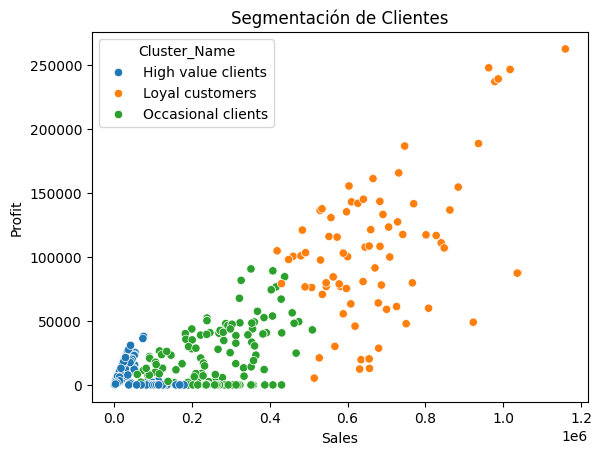

In [267]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

#1. Data Preparation:
# Select the relevant variables for segmentation, including new ones
segmentation_data = df[['Country', 'Product', 'Discount Band', 'Units Sold', 'Sales',
                        'Profit', 'Manufacturing Price', 'Sale Price', 'COGS',
                        'Month Number']]

#Apply One-Hot Encoding to Categorical Variables
segmentation_data = pd.get_dummies(segmentation_data,
                                 columns=['Country', 'Product', 'Discount Band'],
                                 drop_first=True)

#2. Segmentation with K-Means:
# Scale numeric variables (including new ones)
scaler = StandardScaler()

# Select all numeric columns (including new ones)
numerical_cols = segmentation_data.select_dtypes(include=['number']).columns
scaled_data = scaler.fit_transform(segmentation_data[numerical_cols])

# Find the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show() #view the graph to determine the optimal number of clusters

# 3. Naming clusters (before visualization)
cluster_names = {
    0: "High value clients",
    1: "Loyal customers",
    2: "Occasional clients"
}

# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled_data)

# Assign the clusters to the original DataFrame
segmentation_data['Cluster'] = kmeans.labels_

# Map cluster names
segmentation_data['Cluster_Name'] = segmentation_data['Cluster'].map(cluster_names)

# 4. Analysis of the segments:
for cluster_name in cluster_names.values():
    print(f"Cluster {cluster_name}:")
    print(segmentation_data[segmentation_data['Cluster_Name'] == cluster_name].describe())
    print('\n')

# 5. Visualización:
# View clusters using the 'Cluster_Name' column
cluster_order = ["High value clients", "Loyal customers", "Occasional clients"]  # Define the desired order
sns.scatterplot(x='Sales', y='Profit', hue='Cluster_Name', hue_order=cluster_order, data=segmentation_data)
plt.title('Segmentación de Clientes')
plt.show()

###Temporality Analysis

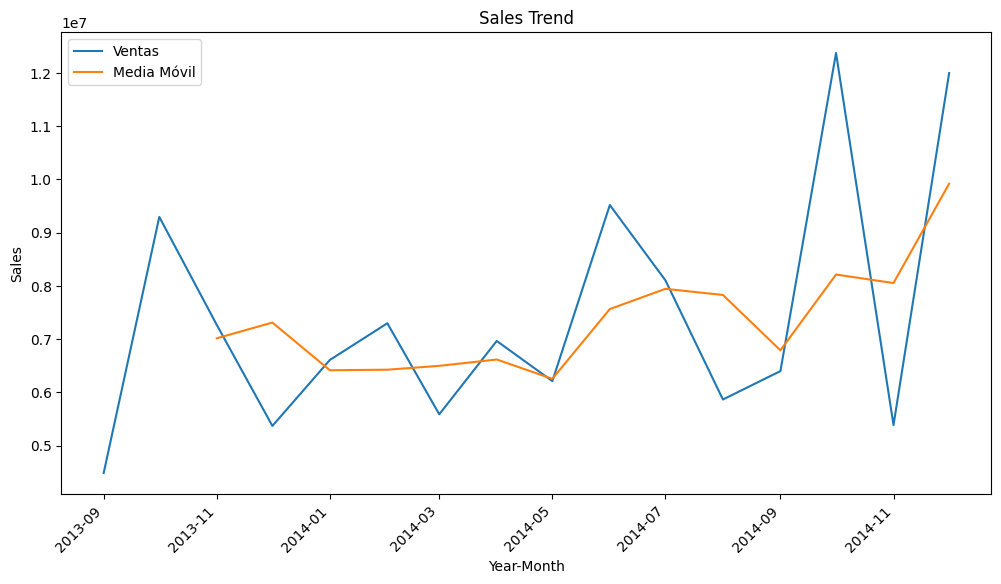

In [268]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

#1. Group sales by month and year (using 'Month Number' and 'Year')
monthly_sales = df.groupby(['Year', 'Month Number'])['Sales'].sum().reset_index()
monthly_sales.columns = ['Year', 'Month', 'Sales']  # Rename 'Month Number' to 'Month'

#2. Create an index that combines year and month
monthly_sales['YearMonth'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str).str.zfill(2)
monthly_sales = monthly_sales.set_index('YearMonth')

#3. Decompose the time series (without generating graphs)
#seasonal_decompose needs a DateTimeIndex
monthly_sales['Date'] = pd.to_datetime(monthly_sales.index + '-01')
monthly_sales = monthly_sales.set_index('Date')

result = seasonal_decompose(monthly_sales['Sales'], model='additive', period=4) #seasonal_decompose continues calculating but does not generate the graphs
# result.plot() # Remove or comment out this line
# plt.show() # Remove or comment out this line

#4. Trend Identification
# to. Calculate the moving average to smooth the time series
monthly_sales['MovingAverage'] = monthly_sales['Sales'].rolling(window=3).mean()

#b. Visualize the trend with the moving average
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Sales'], label='Ventas')
plt.plot(monthly_sales['MovingAverage'], label='Media Móvil')
plt.title('Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

##Conclusions

- Customer segmentation: Three main customer segments were identified: "High value clients", "Loyal customers" and "Occasional clients".
"High value customers": This segment is characterized by a high sales volume, a high profit margin and a high purchase frequency. They are key customers for the business and strategies must be implemented to retain them.
"Loyal customers": This segment makes regular purchases, although with a lower volume and profit margin than "High value customers." They are important clients to maintain the stability of the business and strategies must be implemented to increase their value.
"Occasional clients": This segment makes sporadic purchases with a low volume and profit margin. Strategies must be implemented to convert them into loyal customers or to increase the frequency of their purchases.
- Relevant variables: The most relevant variables for customer segmentation were "Units Sold", "Sales", "Profit", "Manufacturing Price", "Sale Price", "COGS" and "Month Number". These variables allow us to identify purchasing patterns and differentiate customer segments.
- Marketing strategies: Specific marketing strategies can be developed for each customer segment, such as:
"High value clients": Loyalty programs, exclusive access to new products, personalized offers.
"Loyal customers": Promotions to increase purchase volume, incentives for recommendations to other customers.
"Occasional clients": Marketing campaigns to increase purchasing frequency, special offers for products of interest.
- Optimizing sales strategies: Customer segmentation analysis provides valuable information to optimize sales strategies, such as:
Prices: Adjust product prices according to the sensitivity of each segment.
Promotions: Design specific promotions for each segment.
Communication: Personalize communication with customers in each segment.
- Improving business performance: By implementing more effective marketing and sales strategies, it is expected to improve business performance in terms of:
Increase in sales.
Greater profitability.
Customer loyalty.